# About this notebook 

#### Feature: Description

This is one of a series of notebooks (one for each feature of interest) that explores the feature.  The Description feature requires engagement of natural language processing (NLP), so the exploration of this feature varies from that of the other features.

<div class="span5 alert alert-success">
<p> <I> Feature Description: </I> The "Description" data is a profile write-up for each pet.  The Description data will be explored via...   
    1. converting a dataframe of the Description data to a text file   
    2. converting the text file to a list of sentences and to a list of words   
    3. create a histogram of word length counts   
     <br>
    <I> Source: </I> https://www.kaggle.com/c/petfinder-adoption-prediction/data  </p>
</div>

<div class="span5 alert alert-success">
<p> <I> Predictor (Adoption Speed) Description: </I> 

Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted.   
<br> 
The values are determined in the following way:   
0 - Pet was adopted on the same day as it was listed.    
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.    
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.    
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.    
4 - No adoption after 100 days of being listed.    

</p>
</div>

In [38]:
import warnings
warnings.filterwarnings('ignore')

%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData


<div class="span5 alert alert-info">
<p> <B>  Imports and Data Loading: </B>  </p>
</div>

In [39]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [40]:
#import nltk
#nltk.download('punkt')

In [41]:
#Import the csv file

dfi = pd.read_csv('train.csv')
dfi.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,1,Lil Milo,2,0,26,2,2,0,0,2,...,1,1,0,41326,1a2113010d6048d5410b265347b35c91,0,Milo went missing after a week with her new ad...,375905770,3,3


<div class="span5 alert alert-info">
<p> <B>  Missing Data: </B>  </p>
</div>

In [42]:
#Create Type Dataframe

dfa = dfi[['Description']]
dfa.columns = ['description']

In [43]:
# Percentage of missing values in each column
pd.DataFrame(
    dfa.isnull().sum() / len(dfa),
    columns=['% Missing Values']
).transpose()

,description
% Missing Values,0.0008


<div class="span5 alert alert-info">
<p> <B>  Preparing the text data </B>  </p>
</div>

In [44]:
#save all pets' descriptions to a text file
np.savetxt('petdescriptions.txt', dfa.values,fmt='%s',encoding="utf-8")

In [45]:
# load the text file
filename = 'petdescriptions.txt'
file = open(filename, 'rt',encoding="utf8")
text = file.read()
file.close()

In [46]:
# split text file into sentences
sentences = nltk.sent_tokenize(text)
print(sentences[0])

Milo went missing after a week with her new adoptive family.


In [47]:
#split text file into words
tokens = nltk.word_tokenize(text)
print(tokens[:100])

['Milo', 'went', 'missing', 'after', 'a', 'week', 'with', 'her', 'new', 'adoptive', 'family', '.', 'Only', '3', 'months', 'old', ',', 'light', 'brown', 'coat', '.', 'Missing', 'from', 'Jalan', 'Kiara', ',', 'Bandar', 'Botanic', ',', 'Klang', '.', 'Please', 'call', 'Su', 'at', 'if', 'you', "'ve", 'seen', 'her', '.', 'She', "'s", 'only', '4', 'months', 'old', ',', 'very', 'friendly', 'and', 'loving', '.', 'Loves', 'attention', '.', 'A', 'little', 'naughty', 'sometimes', '.', 'But', 'she', "'s", 'adorable', '.', 'I', 'adopted', 'her', 'from', 'MDDB', ',', 'but', 'recently', 'I', 'have', 'just', 'moved', 'to', 'a', 'condo', '.', 'Im', 'finding', 'a', 'perfect', 'and', 'loving', 'home', 'for', 'her', '.', 'Mama', 'cat', 'came', 'to', 'house', 'and', 'gave', 'birth']


In [48]:
#remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['Milo', 'went', 'missing', 'after', 'a', 'week', 'with', 'her', 'new', 'adoptive', 'family', 'Only', 'months', 'old', 'light', 'brown', 'coat', 'Missing', 'from', 'Jalan', 'Kiara', 'Bandar', 'Botanic', 'Klang', 'Please', 'call', 'Su', 'at', 'if', 'you', 'seen', 'her', 'She', 'only', 'months', 'old', 'very', 'friendly', 'and', 'loving', 'Loves', 'attention', 'A', 'little', 'naughty', 'sometimes', 'But', 'she', 'adorable', 'I', 'adopted', 'her', 'from', 'MDDB', 'but', 'recently', 'I', 'have', 'just', 'moved', 'to', 'a', 'condo', 'Im', 'finding', 'a', 'perfect', 'and', 'loving', 'home', 'for', 'her', 'Mama', 'cat', 'came', 'to', 'house', 'and', 'gave', 'birth', 'to', 'these', 'lovely', 'kittens', 'please', 'adopt', 'them', 'and', 'give', 'them', 'a', 'home', 'sweet', 'home', 'He', 'is', 'a', 'stray', 'dog', 'found']


In [49]:
#convert the tokens to lowercase
wordslc = [word.lower() for word in words]

print(wordslc[:100])

['milo', 'went', 'missing', 'after', 'a', 'week', 'with', 'her', 'new', 'adoptive', 'family', 'only', 'months', 'old', 'light', 'brown', 'coat', 'missing', 'from', 'jalan', 'kiara', 'bandar', 'botanic', 'klang', 'please', 'call', 'su', 'at', 'if', 'you', 'seen', 'her', 'she', 'only', 'months', 'old', 'very', 'friendly', 'and', 'loving', 'loves', 'attention', 'a', 'little', 'naughty', 'sometimes', 'but', 'she', 'adorable', 'i', 'adopted', 'her', 'from', 'mddb', 'but', 'recently', 'i', 'have', 'just', 'moved', 'to', 'a', 'condo', 'im', 'finding', 'a', 'perfect', 'and', 'loving', 'home', 'for', 'her', 'mama', 'cat', 'came', 'to', 'house', 'and', 'gave', 'birth', 'to', 'these', 'lovely', 'kittens', 'please', 'adopt', 'them', 'and', 'give', 'them', 'a', 'home', 'sweet', 'home', 'he', 'is', 'a', 'stray', 'dog', 'found']


<div class="span5 alert alert-info">
<p> <B>  Create a histogram of sentence lengths </B>  </p>
</div>

Total sentences: 69792
Total words: 904004


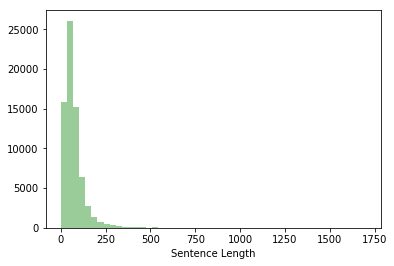

In [50]:
#calculate length of each sentence
sentence_length = [len(s) for s in sentences]

print('Total sentences: ' + str(len(sentences)))
print('Total words: ' + str(len(wordslc)))

#plot histogram
sns.distplot(sentence_length,hist=True, color='g', axlabel='Sentence Length', kde = False)

plt.show()